# Part A.1

## Lane–Emden Equation: Step-by-Step Breakdown
The Lane–Emden equation is given as:

$
\frac{1}{\xi^2} \frac{d}{d\xi} \left( \xi^2 \frac{d\theta}{d\xi} \right) + \theta^n = 0
$

## Assumption:
Expand $\theta(\xi)$ as:

$
\theta(\xi) = 1 + a_2 \xi^2 + a_4 \xi^4 + \dots
$

Substitute this into the Lane–Emden equation.

---

## Step-by-Step Expansion:

### First Derivative $\frac{d\theta}{d\xi}$:
$
\frac{d\theta}{d\xi} = 2a_2 \xi + 4a_4 \xi^3 + \dots
$

### Second Derivative $\frac{d^2\theta}{d\xi^2}$:
$
\frac{d^2\theta}{d\xi^2} = 2a_2 + 12a_4 \xi^2 + \dots
$

### Mass Continuity Term:
The term $\frac{1}{\xi^2} \frac{d}{d\xi} \left( \xi^2 \frac{d\theta}{d\xi} \right)$:

Start with:
$
\frac{d}{d\xi} \left( \xi^2 \frac{d\theta}{d\xi} \right) = \frac{d}{d\xi} \left( \xi^2 \left( 2a_2 \xi + 4a_4 \xi^3 \right) \right)
$

Expand:
$
\xi^2 \frac{d\theta}{d\xi} = 2a_2 \xi^3 + 4a_4 \xi^5 + \dots
$

Differentiate:
$
\frac{d}{d\xi} \left( \xi^2 \frac{d\theta}{d\xi} \right) = 6a_2 \xi^2 + 20a_4 \xi^4 + \dots
$

Divide by $\xi^2$:
$
\frac{1}{\xi^2} \frac{d}{d\xi} \left( \xi^2 \frac{d\theta}{d\xi} \right) = 6a_2 + 20a_4 \xi^2 + \dots
$

---

### Polytropic Term $\theta^n$:
Expand $(1 + a_2 \xi^2 + a_4 \xi^4)^n$ using the binomial theorem:
$
\theta^n = 1 + n a_2 \xi^2 + \left( n a_4 + \frac{n(n-1)}{2} a_2^2 \right) \xi^4 + \dots
$

---

### Substitution:
Substitute all terms into the Lane–Emden equation:
$
\frac{1}{\xi^2} \frac{d}{d\xi} \left( \xi^2 \frac{d\theta}{d\xi} \right) + \theta^n = 0
$

This becomes:
$
\left( 6a_2 + 20a_4 \xi^2 + \dots \right) + \left( 1 + n a_2 \xi^2 + \dots \right) = 0
$

---

## Matching Powers of $\xi$:

### Constant Term ($\xi^0$):
$
6a_2 + 1 = 0 \quad \Rightarrow \quad a_2 = -\frac{1}{6}
$

### Quadratic Term ($\xi^2$):
$
20a_4 + n a_2 = 0 \quad \Rightarrow \quad a_4 = -\frac{n a_2}{20}
$

Substitute $a_2 = -\frac{1}{6}$:
$
a_4 = -\frac{n \left( -\frac{1}{6} \right)}{20} = \frac{n}{120}
$

---

## Final Result:
$
a_2 = -\frac{1}{6}, \quad a_4 = \frac{n}{120}
$

---

## Below you can run the code to find the values computationally.

In [1]:
import sympy

# Define variables
xi = sympy.Symbol('xi', real=True)
n = sympy.Symbol('n', real=True, positive=True)

# Coefficients in the expansion
a2 = sympy.Symbol('a2', real=True)
a4 = sympy.Symbol('a4', real=True)

# Expansion of θ(ξ)
theta = 1 + a2 * xi**2 + a4 * xi**4

# First and second derivatives of θ(ξ)
dtheta = theta.diff(xi)
ddtheta = dtheta.diff(xi)

# Mass continuity term: (1/xi^2) * d/dxi(xi^2 * dθ/dxi)
mass_continuity = (1 / xi**2) * ((xi**2) * dtheta).diff(xi)

# Polytropic term: θ^n
polytropic_term = theta**n

# Lane-Emden equation
lane_emden_eq = mass_continuity + polytropic_term

# Expand the Lane-Emden equation about xi = 0
LE_series = sympy.series(lane_emden_eq, xi, 0, 6).expand()

# Collect coefficients of powers of xi
coeffs = sympy.collect(LE_series, xi, evaluate=False)

# Extract terms for matching powers of xi
constant_term = coeffs.get(1, 0)  # Coefficient of ξ^0
quadratic_term = coeffs.get(xi**2, 0)  # Coefficient of ξ^2

# Solve for a2 and a4
a2_solution = sympy.solve(constant_term, a2)[0]
a4_solution = sympy.solve(quadratic_term.subs(a2, a2_solution), a4)[0]

# Display results
print("Lane-Emden series about xi=0 up to xi^5:")
print(LE_series)
print("\nSolution for a2 and a4:")
print(f"a2 = {a2_solution}")
print(f"a4 = {a4_solution}")

Lane-Emden series about xi=0 up to xi^5:
1 + 20*a4*xi**2 + a4*n*xi**4 + 6*a2 + a2*n*xi**2 - a2**2*n*xi**4/2 + a2**2*n**2*xi**4/2 + O(xi**6)

Solution for a2 and a4:
a2 = -1/6 + O(xi**6)
a4 = n/120 + O(xi**6)


# Part A.2

## Below you can run the code to find the solution θ(ξ) = sin(ξ)/ξ computationally.

In [2]:
import sympy as sp

# Define symbolic variables and function
xi = sp.Symbol('xi', positive=True)
theta = sp.Function('theta')(xi)

# Lane-Emden equation for n=1
LE_eq = (1/xi**2) * sp.diff(xi**2 * sp.diff(theta, xi), xi) + theta

# Solve the Lane-Emden equation symbolically
solution = sp.dsolve(LE_eq, theta)

# Print the general solution
print("General solution to the Lane-Emden equation for n=1:")
sp.pprint(solution)

# Verify the boundary conditions
# The boundary conditions are:
#   theta(0) = 1, theta'(0) = 0
# Since solving symbolically can be challenging with these specific BCs,
# we will validate by substituting a known solution (sin(xi)/xi).

candidate_solution = sp.sin(xi) / xi
test_eq = LE_eq.subs(theta, candidate_solution)
test_eq_simplified = sp.simplify(test_eq)

# Provide a more descriptive output for the verification
print("\nVerification of the candidate solution θ(ξ) = sin(ξ)/ξ:")
print("Substituting θ(ξ) = sin(ξ)/ξ into the Lane-Emden equation gives:")
sp.pprint(test_eq)
if test_eq_simplified == 0:
    print("\nThe candidate solution θ(ξ) = sin(ξ)/ξ satisfies the Lane-Emden equation for n=1.")
else:
    print("\nThe candidate solution θ(ξ) = sin(ξ)/ξ does NOT satisfy the Lane-Emden equation.")


General solution to the Lane-Emden equation for n=1:
       C₁⋅besselj(1/2, ξ) + C₂⋅bessely(1/2, ξ)
θ(ξ) = ───────────────────────────────────────
                          √ξ                  

Verification of the candidate solution θ(ξ) = sin(ξ)/ξ:
Substituting θ(ξ) = sin(ξ)/ξ into the Lane-Emden equation gives:
              2                         
          2  d ⎛sin(ξ)⎞       d ⎛sin(ξ)⎞
         ξ ⋅───⎜──────⎟ + 2⋅ξ⋅──⎜──────⎟
              2⎝  ξ   ⎠       dξ⎝  ξ   ⎠
sin(ξ)      dξ                          
────── + ───────────────────────────────
  ξ                      2              
                        ξ               

The candidate solution θ(ξ) = sin(ξ)/ξ satisfies the Lane-Emden equation for n=1.


# Part B: White Dwarf Data Fitting

                           wdid   logg   mass
0       2MASS J10145164+4541479  7.455  0.301
1          2QZ J114947.9-012045  8.497  0.907
2                     GJ 1179 B  7.783  0.454
3  Gaia DR2 1007682723024253184  7.885  0.510
4  Gaia DR2 1010300965150157824  8.035  0.600


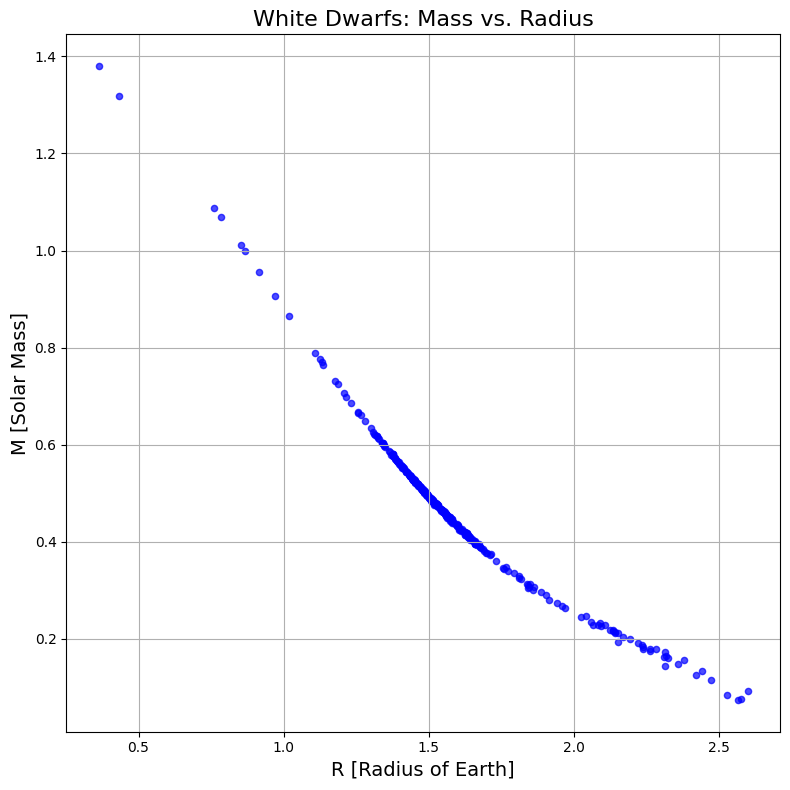

In [47]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants in CGS
G_CGS        = 6.6743e-8        # gravitational constant [cm^3 g^-1 s^-2]
MSUN_GRAMS   = 1.989e33         # solar mass in grams
REARTH_CM    = 6.371e8          # Earth radius in cm

# ------------------------------------------------------------
# 1) Read the CSV data with Pandas
# ------------------------------------------------------------
df = pd.read_csv('white_dwarf_data.csv', comment='#')  
# Make sure your CSV file has no problematic header lines or weird delimiters
# By default, pd.read_csv assumes comma-separated columns.

# Let's see the first few lines:
print(df.head())

# The columns in df should be: ['wdid','logg','mass']
# wdid: star name
# logg: log10 of surface gravity in cgs
# mass: WD mass in solar masses

# ------------------------------------------------------------
# 2) Convert mass & logg => radius in Earth radii
# ------------------------------------------------------------
# log(g) in cgs => g in cm/s^2
g_vals = 10**df['logg'].values

# mass in solar masses => mass in grams
m_vals = df['mass'].values * MSUN_GRAMS

# radius in cm => sqrt( G M / g )
r_cm   = np.sqrt(G_CGS * m_vals / g_vals)

# radius in Earth radii
r_earth = r_cm / REARTH_CM

# ------------------------------------------------------------
# 3) Make a scatter plot of M vs. R
#    (User asked for M in solar masses vs R in Earth radii.)
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(r_earth, df['mass'], 
           marker='o', color='blue', alpha=0.7, s=20)

ax.set_xlabel(r'R [Radius of Earth]', fontsize=14)
ax.set_ylabel(r'M [Solar Mass]', fontsize=14)
ax.set_title('White Dwarfs: Mass vs. Radius', fontsize=16)

ax.grid(True)
plt.tight_layout()
plt.savefig('Newton_PartB_WhiteDwarfDataFitting.pdf', bbox_inches='tight')
plt.show()

# Part C.1: Symbolic expansion and finding the leading term

In [26]:
import sympy

# Define symbols
x = sympy.Symbol('x', real=True, positive=True)

# Step 1: Expand the first term inside the bracket
# x(2x^2 - 3)sqrt(1 + x^2)
sqrt_expansion = 1 + x**2 / 2 - x**4 / 8  # Expand sqrt(1 + x^2) for small x
x_term = x * (2 * x**2 - 3)  # x(2x^2 - 3)
first_term = x_term * sqrt_expansion  # Combine terms
first_term_expanded = sympy.expand(first_term)  # Expand into polynomial form

print("\n1. Expansion of x(2x^2 - 3)sqrt(1 + x^2):")
print(first_term_expanded)

# Step 2: Expand the second term 3 * sinh^-1(x)
# sinh^-1(x) ≈ x - x^3/6 + 3x^5/40
asinh_expansion = x - x**3 / 6 + 3 * x**5 / 40
second_term = 3 * asinh_expansion  # Multiply by 3
second_term_expanded = sympy.expand(second_term)

print("\n2. Expansion of 3 * sinh^-1(x):")
print(second_term_expanded)

# Step 3: Combine the expanded terms
combined_expansion = first_term_expanded + second_term_expanded
simplified_combined = sympy.simplify(combined_expansion)

print("\n3. Combined Expansion:")
print(simplified_combined)

# Step 4: Identify the leading term
# Extract terms proportional to x^5
leading_term = simplified_combined.as_leading_term(x)

print("\n4. Leading Term:")
print(leading_term)

# Verify result against theoretical expectation
expected_leading_term = (8 / 5) * x**5


1. Expansion of x(2x^2 - 3)sqrt(1 + x^2):
-x**7/4 + 11*x**5/8 + x**3/2 - 3*x

2. Expansion of 3 * sinh^-1(x):
9*x**5/40 - x**3/2 + 3*x

3. Combined Expansion:
x**5*(32 - 5*x**2)/20

4. Leading Term:
8*x**5/5


# Part C.2: Curve Fitting

Fitted slope (alpha)     = -0.3813
Inferred polytropic n*  = 1.5521
Effective c_val         = 10^(intercept) = 3.6434e+21


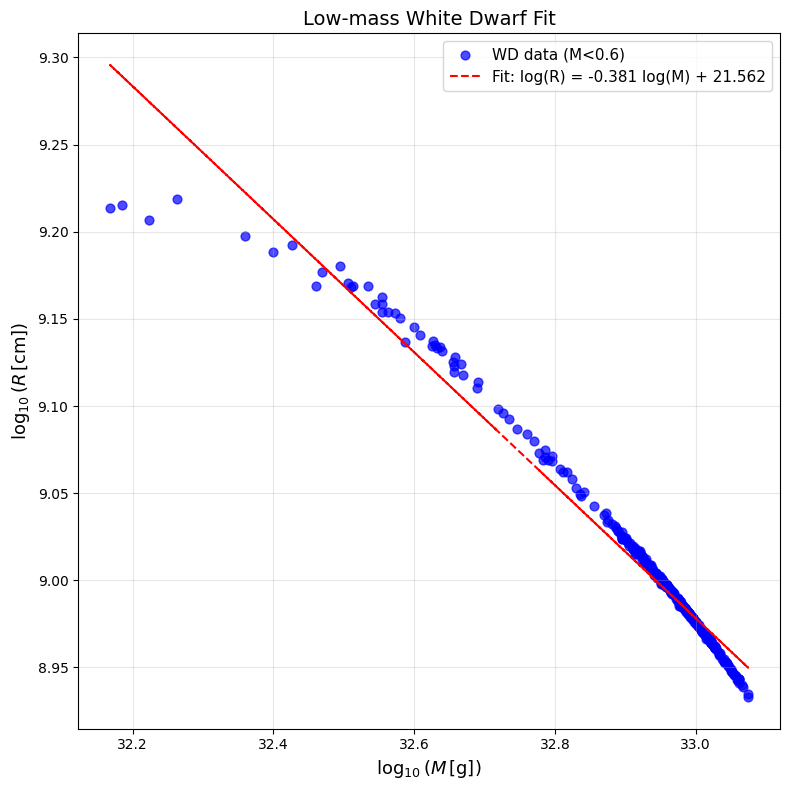

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#-------------------------------------------------
# 1) Constants in cgs
#-------------------------------------------------
G_cgs    = 6.6743e-8           # gravitational constant [cm^3 g^-1 s^-2]
Msun_g   = 1.989e33            # solar mass in grams

#-------------------------------------------------
# 2) Read CSV data
#    Format: wdid, logg, mass
#    - 'logg' is log10(g) in cgs
#    - 'mass' is in solar masses
#-------------------------------------------------
df = pd.read_csv('white_dwarf_data.csv')

#-------------------------------------------------
# 3) Filter to low-mass WDs: M < 0.6 M_sun
#-------------------------------------------------
df_lowmass = df[df['mass'] < 0.6].copy()
df_lowmass.reset_index(drop=True, inplace=True)

#-------------------------------------------------
# 4) Convert each WD's (mass, logg) --> radius
#    R = sqrt( G * M / g ), all in cgs
#-------------------------------------------------
#  - Convert mass from M_sun to grams
#  - Convert logg to g in cm/s^2
#  - Then compute R in cm
mass_g = df_lowmass['mass'].values * Msun_g
g_vals = 10.0**(df_lowmass['logg'].values)
R_vals = np.sqrt(G_cgs * mass_g / g_vals)  # cm

# (Optional) Store these in the DataFrame
df_lowmass['mass_g'] = mass_g
df_lowmass['g_cgs']  = g_vals
df_lowmass['R_cgs']  = R_vals

#-------------------------------------------------
# 5) Do a log–log fit:  log10(R) = intercept + slope * log10(M)
#    We'll fit R vs. M in cgs units
#-------------------------------------------------
logM = np.log10(mass_g)
logR = np.log10(R_vals)

# Use a simple linear least-squares fit in log space
slope, intercept = np.polyfit(logM, logR, 1)

#-------------------------------------------------
# 6) Convert slope -> polytropic index n_star (heuristic)
#
#    We are modeling R ~ c * M^alpha in log–log space, so:
#       log(R) = log(c) + alpha * log(M).
#
#    For a polytrope of index n:
#       (common) M vs. R "scaling" can be cast as R \propto M^{(1-n)/(3-n)}
#       => alpha = (1 - n) / (3 - n).
#       => solve for n: 
#          => n = (3 alpha - 1) / (alpha - 1).
#-------------------------------------------------
alpha = slope
n_star = (3.0*alpha - 1.0)/(alpha - 1.0)

#-------------------------------------------------
# 7) (Optional) Deduce an effective K_star from intercept
#
#    If we assume a single "average" central density for the sample
#    (a big assumption), one can try to back out a single polytropic K.
#    But in practice, each star has a different \rho_c.  We'll just
#    demonstrate how one *might* interpret the intercept:
#
#       log(c) = intercept  =>  c = 10^(intercept).
#
#    Then R = c M^alpha.  But a full expression for c in terms of
#    (K_star, n_star, G, etc.) normally also includes \rho_c.  So this
#    "K_star" here is only a *representative* fit parameter, not a
#    universal constant for all WDs in reality.
#-------------------------------------------------
c_val = 10.0**(intercept)

#-------------------------------------------------
# 8) Print results
#-------------------------------------------------
print(f"Fitted slope (alpha)     = {alpha:.4f}")
print(f"Inferred polytropic n*  = {n_star:.4f}")
print(f"Effective c_val         = 10^(intercept) = {c_val:.4e}")

#-------------------------------------------------
# 9) Make a pretty plot: log10(R) vs. log10(M)
#-------------------------------------------------
plt.figure(figsize=(8,8))
plt.scatter(logM, logR, c='blue', s=40, alpha=0.7, label='WD data (M<0.6)')

# Plot best-fit line
fit_line = slope*logM + intercept
plt.plot(logM, fit_line, 'r--', label='Fit: log(R) = %.3f log(M) + %.3f'%(slope,intercept))

# Labels, legend, etc.
plt.xlabel(r'$\log_{10}(M \,[\mathrm{g}])$', fontsize=13)
plt.ylabel(r'$\log_{10}(R \,[\mathrm{cm}])$', fontsize=13)
plt.title('Low-mass White Dwarf Fit', fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('Newton_PartC2.pdf', bbox_inches='tight')
plt.show()



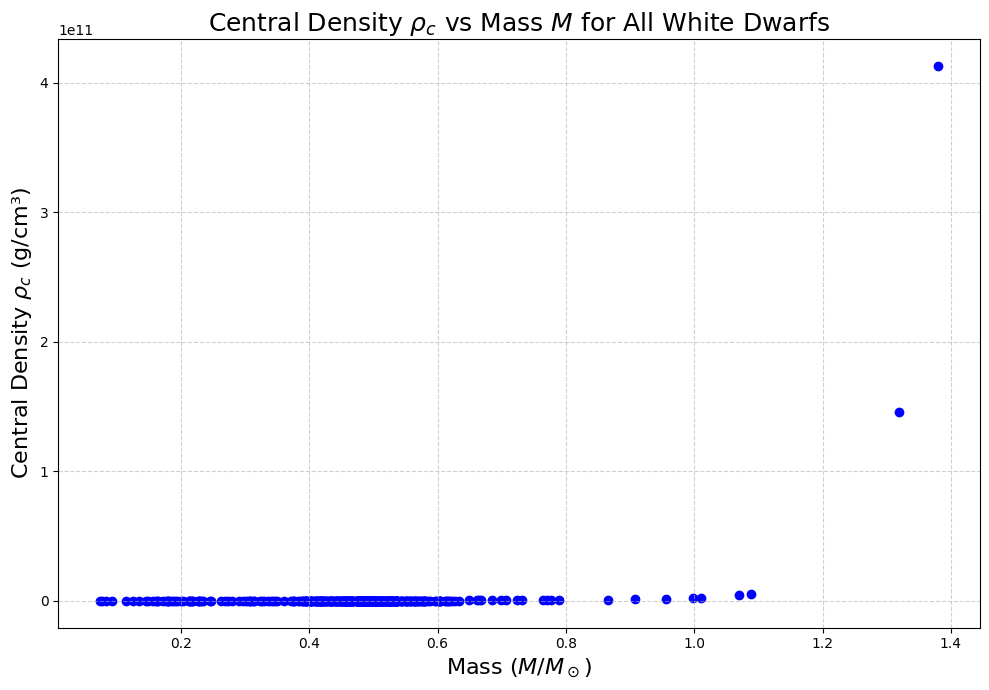

We are using 0.6 as low-mass threshold for this example.


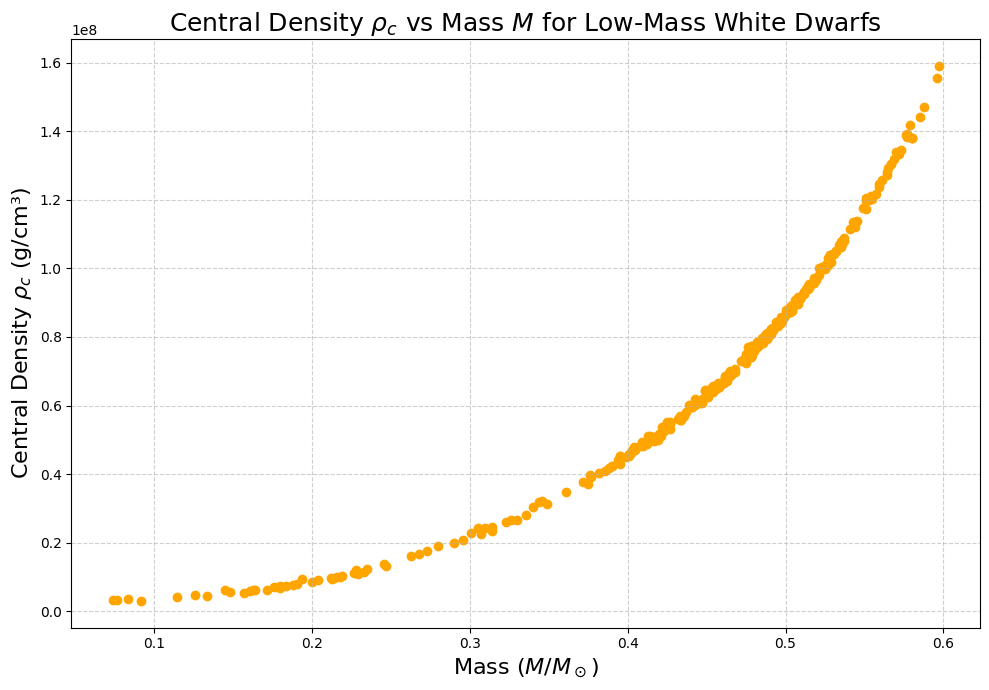

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-8  # Gravitational constant in cgs (dyn·cm²/g²)
M_sun = 1.989e33  # Solar mass in grams
n_star = 1.5  # Polytropic index (from q=3)
xi_1 = 3.65375  # Lane-Emden zero for n=1.5
le_integral = 2.71406  # Integral of xi^2 * theta^n for n=1.5
K_star = 1e13  # Example value, replace this with the actual fitted value!

# Function to calculate central density
def compute_rho_c(M, R):
    a = R / xi_1
    rho_c = (a**2 * 4 * np.pi * G / ((n_star + 1) * K_star)) ** (n_star / (1 - n_star))
    return rho_c

# Load data
data = pd.read_csv('white_dwarf_data.csv')

# Rename columns for consistency
data.columns = ['wdid', 'logg', 'mass']

# Convert mass to grams and calculate radius
data['Mass'] = data['mass'] * M_sun  # Convert from solar masses to grams
data['g'] = 10**data['logg']  # Convert log(g) to g in cgs
data['Radius'] = np.sqrt(G * data['Mass'] / data['g'])  # Radius in cm

# Calculate central density for all WDs
data['rho_c'] = data.apply(lambda row: compute_rho_c(row['Mass'], row['Radius']), axis=1)

# Filter for low-mass WDs
low_mass_data = data[data['mass'] < 0.6]  # Example threshold for low mass in solar masses

# Figure 1: All data
plt.figure(figsize=(10, 6))
plt.scatter(data['mass'], data['rho_c'], c='blue', label='All WDs')
plt.xlabel('Mass ($M/M_\odot$)', fontsize=16)
plt.ylabel('Central Density $\\rho_c$ (g/cm³)', fontsize=16)
plt.title('Central Density $\\rho_c$ vs Mass $M$ for All White Dwarfs', fontsize=18)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('Newton_PartC2.2.pdf', bbox_inches='tight')
plt.show()

print("We are using 0.6 as low-mass threshold for this example.")

# Figure 2: Low-mass data only
plt.figure(figsize=(10, 6))
plt.scatter(low_mass_data['mass'], low_mass_data['rho_c'], c='orange', label='Low-Mass WDs')
plt.xlabel('Mass ($M/M_\odot$)', fontsize=16)
plt.ylabel('Central Density $\\rho_c$ (g/cm³)', fontsize=16)
plt.title('Central Density $\\rho_c$ vs Mass $M$ for Low-Mass White Dwarfs', fontsize=18)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('Newton_PartC2.3.pdf', bbox_inches='tight')
plt.show()


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#----------------------------------------------------------------
# 1) Numerically solve the Lane-Emden equation for index n = 1.55
#    We want:
#       dtheta/dxi = phi
#       dphi/dxi   = -(2/xi)phi - theta^n
#
#    Subject to initial conditions:
#       theta(0) = 1
#       phi(0)   = 0
#----------------------------------------------------------------
def lane_emden_equations(xi, y, n):
    """
    y[0] = theta, y[1] = dtheta/dxi = phi
    n = polytropic index
    """
    theta, phi = y
    if xi == 0.0:
        # Avoid 0/0 at xi=0: near origin, mass ~ xi^3 => (2/xi)*phi => 0 as xi->0
        dphi_dxi = -theta**n
    else:
        dphi_dxi = -(2./xi)*phi - theta**n
    return [phi, dphi_dxi]

def solve_lane_emden(n, ximax=20000.0, tol=1e-8):
    """
    Integrate Lane-Emden from xi=0 up to the first zero of theta.
    Returns xi_1, the solution arrays, and I_n = integral of xi^2 theta^n dxi.
    """
    # Initial conditions at xi=0
    y0 = [1.0, 0.0]  # theta(0)=1, phi(0)=0
    # We integrate out to some large ximax, then we'll find the zero crossing
    sol = solve_ivp(
        fun=lambda xi,y: lane_emden_equations(xi,y,n),
        t_span=(1e-12, ximax),
        y0=y0,
        rtol=1e-10, atol=1e-10, dense_output=True
    )
    xi_vals  = sol.t
    theta_sol= sol.y[0]

    # Find the first place where theta crosses zero:
    # We'll just look for sign change in theta.
    sign_theta = np.sign(theta_sol)
    zero_cross_idxs = np.where(np.diff(sign_theta)!=0)[0]
    if len(zero_cross_idxs)==0:
        raise RuntimeError("No zero crossing found up to ximax={}".format(ximax))
    i0 = zero_cross_idxs[0]

    # Interpolate to find the more precise root of theta
    xi_left  = xi_vals[i0]
    xi_right = xi_vals[i0+1]
    # We'll do a simple bisection or use np.interp:
    # but let's do a direct bisection for clarity
    def f(xi_test):
        return sol.sol(xi_test)[0]  # = theta(xi_test)

    for _ in range(60):
        mid = 0.5*(xi_left + xi_right)
        if f(mid)*f(xi_left) > 0:
            xi_left = mid
        else:
            xi_right= mid
        if abs(xi_right - xi_left)<tol:
            break
    xi1 = 0.5*(xi_left + xi_right)

    # Now we also want I_n = \int_0^{xi1} xi^2 theta^n dxi
    # We can do a separate numeric integration from 0->xi1
    # using the same dense solution 'sol'.
    def integrand(xi_local):
        th_local = sol.sol(xi_local)[0]  # = theta
        if th_local<0:   # just in case near the root
            return 0.0
        return xi_local**2 * (th_local**n)

    # We'll do a small sub-integral
    import math
    from math import floor, ceil

    # We can integrate in small steps or use 'quad' with interpolation:
    num_pts = 2000
    xis = np.linspace(0, xi1, num_pts)
    vals= [integrand(x) for x in xis]
    I_n = np.trapz(vals, xis)

    return xi1, I_n, sol

#----------------------------------------------------------------
# 2) We'll define a function that, given R (in cm), returns rho_c
#    using eq (*):
#
#       rho_c = [ ( R^2 4πG ) / ( ξ_1^2 (n+1) K ) ]^( n/(1-n) )
#
#    We'll assume we have:
#       n      = polytropic index
#       K_star = your best-fit polytropic constant (cgs units)
#       xi_1   = from Lane-Emden
#----------------------------------------------------------------
def get_rho_c_from_radius(R, n, K_star, xi_1):
    G_cgs = 6.6743e-8  # cgs
    top   = R**2 * 4.0*np.pi*G_cgs
    bot   = (xi_1**2) * (n+1.0) * K_star
    exponent = n/(1.0 - n)  # careful with sign if n>1
    val = (top / bot)**(exponent)
    return val

#----------------------------------------------------------------
# 3) Main script
#----------------------------------------------------------------
def main():
    # (a) Solve Lane-Emden for n = 1.55
    n_star = 1.55
    xi_1, I_n, sol = solve_lane_emden(n_star)
    print(f"Lane-Emden for n={n_star:.3f}:")
    print(f"  -> xi_1  = {xi_1:.4f}")
    print(f"  -> I_n   = {I_n:.4f}")

    # (b) Suppose from your earlier fit you deduce an effective K_star in cgs:
    #     (This is only a demonstration; real dimension-checking is recommended.)
    K_star_fit = 3.6434e21

    print(f"Using an assumed polytropic constant K_star = {K_star_fit:8.3e} (cgs)")

    # (c) Read white_dwarf_data.csv and filter for M<0.6
    df = pd.read_csv('white_dwarf_data.csv')
    df = df[df['mass'] < 0.6].copy()
    df.reset_index(drop=True, inplace=True)

    # Constants
    Msun_g = 1.989e33
    G_cgs  = 6.6743e-8

    # (d) Convert columns to cgs.  We have:
    #     mass in M_sun -> grams
    #     logg in cgs   -> g in cm/s^2
    #     then R = sqrt(G M / g).
    df['mass_g'] = df['mass']*Msun_g
    df['g_cgs']  = 10.0**(df['logg'])
    df['R_cgs']  = np.sqrt(G_cgs * df['mass_g']/df['g_cgs'])

    # (e) For each WD, compute central density from eq (*), i.e. from R
    rho_c_list = []
    for i in range(len(df)):
        R_i = df.loc[i, 'R_cgs']
        # Use eq (*) with n=n_star, K=K_star_fit, xi_1 from Lane-Emden
        rho_ci = get_rho_c_from_radius(R_i, n_star, K_star_fit, xi_1)
        rho_c_list.append(rho_ci)

    df['rho_c'] = rho_c_list

    # (f) Plot rho_c vs. M
    plt.figure(figsize=(7,6))
    plt.scatter(df['mass'], df['rho_c'], c='r', s=40, alpha=0.7)
    plt.yscale('log')  # central density can span many orders of magnitude
    plt.xlim(0, 0.6)
    plt.xlabel(r'Mass $M$ [$M_\odot$]', fontsize=13)
    plt.ylabel(r'Central Density $\rho_c$ [g/cm$^3$]', fontsize=13)
    plt.title(f'Central Density vs. Mass (n={n_star:.2f} polytrope)', fontsize=14)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # (g) Print out a few lines
    print("\nSample of computed central densities:")
    for i in range(min(5, len(df))):
        print(f" WD={df.loc[i,'wdid']}, M={df.loc[i,'mass']:.3f}, rho_c={df.loc[i,'rho_c']:.3e} g/cm^3")

if __name__ == "__main__":
    main()


C:\Users\erene\AppData\Local\Temp\ipykernel_24100\898214919.py:26: RuntimeWarning: invalid value encountered in scalar power
  dphi_dxi = -(2./xi)*phi - theta**n


RuntimeError: No zero crossing found up to ximax=20000.0